# Install requirements

In [3]:
%pip install --upgrade numpy scipy pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/substance.git@master

  Cloning https://github.com/ParkhomenkoDV/substance.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-req-build-yhslcs46
  Resolved https://github.com/ParkhomenkoDV/substance.git to commit ee75749da2a59d511d1e2f8c4c7df036749135f1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-yhslcs46'


In [5]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/disk.git@master

  Cloning https://github.com/ParkhomenkoDV/disk.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-req-build-g3b57lh1
  Resolved https://github.com/ParkhomenkoDV/disk.git to commit fe0185fd39a33150a499ea599e6c6f59ab7e2cd7
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-za3w6vue\decorators_cc176ac49dbc4befad748c358f6afb7f
  Resolved https://github.com/ParkhomenkoDV/decorators.git to commit 3726185bc73510a53bbde003d0014f358e1bca26
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: s

  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/disk.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-g3b57lh1'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-za3w6vue\decorators_cc176ac49dbc4befad748c358f6afb7f'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/substance.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-za3w6vue\substance_8ecfa8eceeec449eae7b7b24d474d2c4'


**Restart kernel!**

# Import libraries

In [1]:
from numpy import array, arange, linspace
from scipy import interpolate
import pandas as pd

In [2]:
from substance import Material
from disk import Disk

# Create material

In [3]:
material = Material('10Х11Н20ТЗР',
                            {
                                "density": 8400,
                                "alpha": 18 * 10 ** -6,
                                "E": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                          array([1.74, 1.66, 1.57, 1.47, 1.32]) * 10 ** 11,
                                                          kind=3, bounds_error=False, fill_value='extrapolate'),
                                "mu": interpolate.interp1d(arange(400, 800 + 1, 100),
                                                           [0.384, 0.379, 0.371, 0.361, 0.347],
                                                           kind=3, bounds_error=False, fill_value='extrapolate'),
                                "sigma_s": 900 * 10 ** 6
                            })

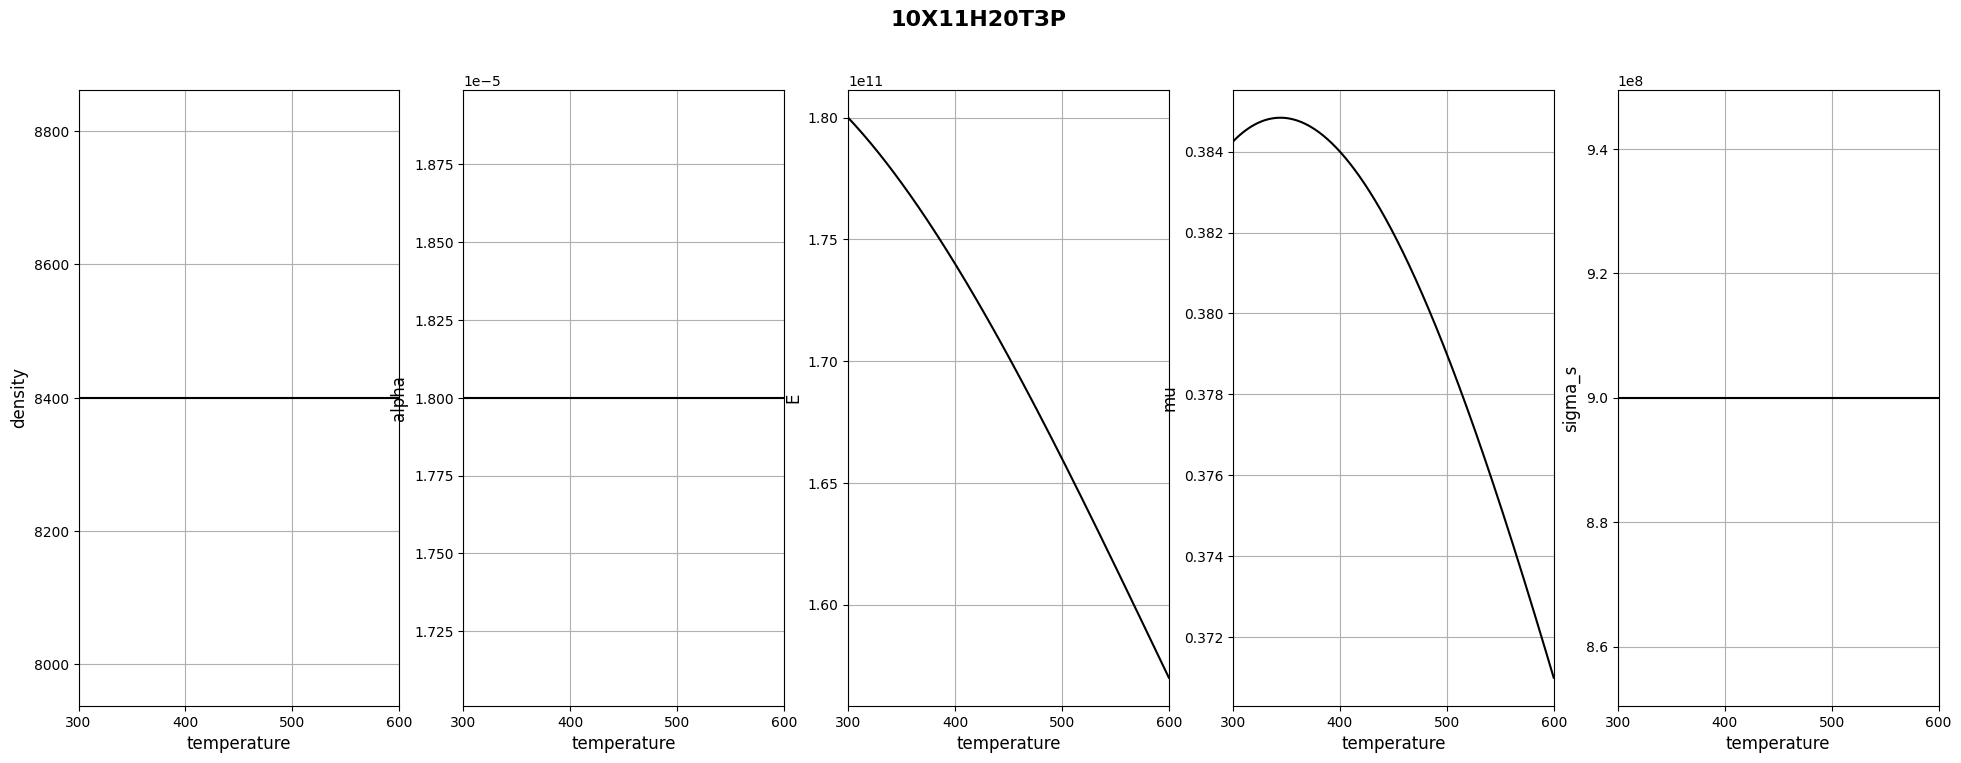

In [4]:
material.show(temperature=linspace(300, 600, 3+1), figsize=(24, 8))

# Create disk geometry

In [5]:
radius = array([20, 26, 30.62, 37.26, 56.94, 60.67, 72.95, 75.95, 102.41, 106.52, 109.82]) / 1000
thickness = array([36, 36, 15.43, 11.27, 10, 12, 12, 8, 6, 11, 11]) / 1000
nholes, rholes, dholes = [5], [66.8 / 1000], [6.2 / 1000]

disk = Disk(material=material,
            radius=radius, thickness=thickness,
            nholes=nholes, rholes=rholes, dholes=dholes)

In [6]:
print(pd.DataFrame({'radius': disk.radius, 'thickness': disk.thickness}))

     radius  thickness
0   0.02000    0.03600
1   0.02600    0.03600
2   0.03062    0.01543
3   0.03726    0.01127
4   0.05694    0.01000
5   0.06067    0.01200
6   0.07295    0.01200
7   0.07595    0.00800
8   0.10241    0.00600
9   0.10652    0.01100
10  0.10982    0.01100


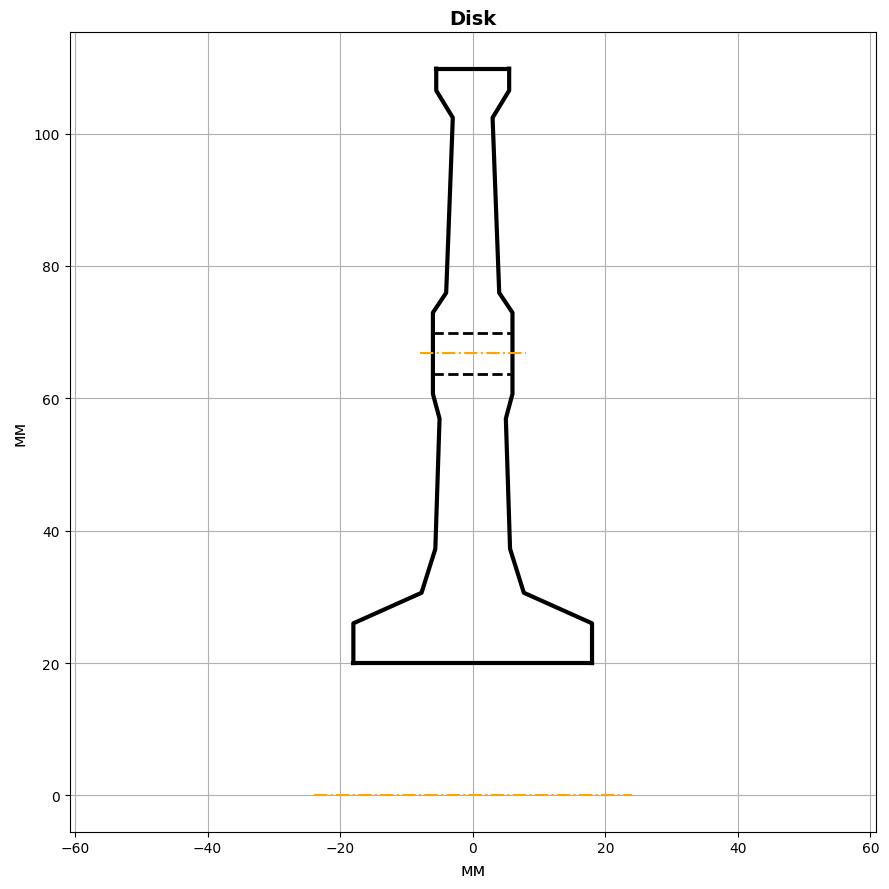

In [7]:
disk.show(figsize=(9, 9), xlabel='мм', ylabel='мм')

# Create conditions

In [8]:
rotation_frequency = 2806.2
temperature0 = 293.15
pressure = (0, 120.6 * 10 ** 6)
temperature = (350, 650)

condition = dict(rotation_frequency=rotation_frequency, temperature0=temperature0, pressure=pressure, temperature=temperature)

# Tensions

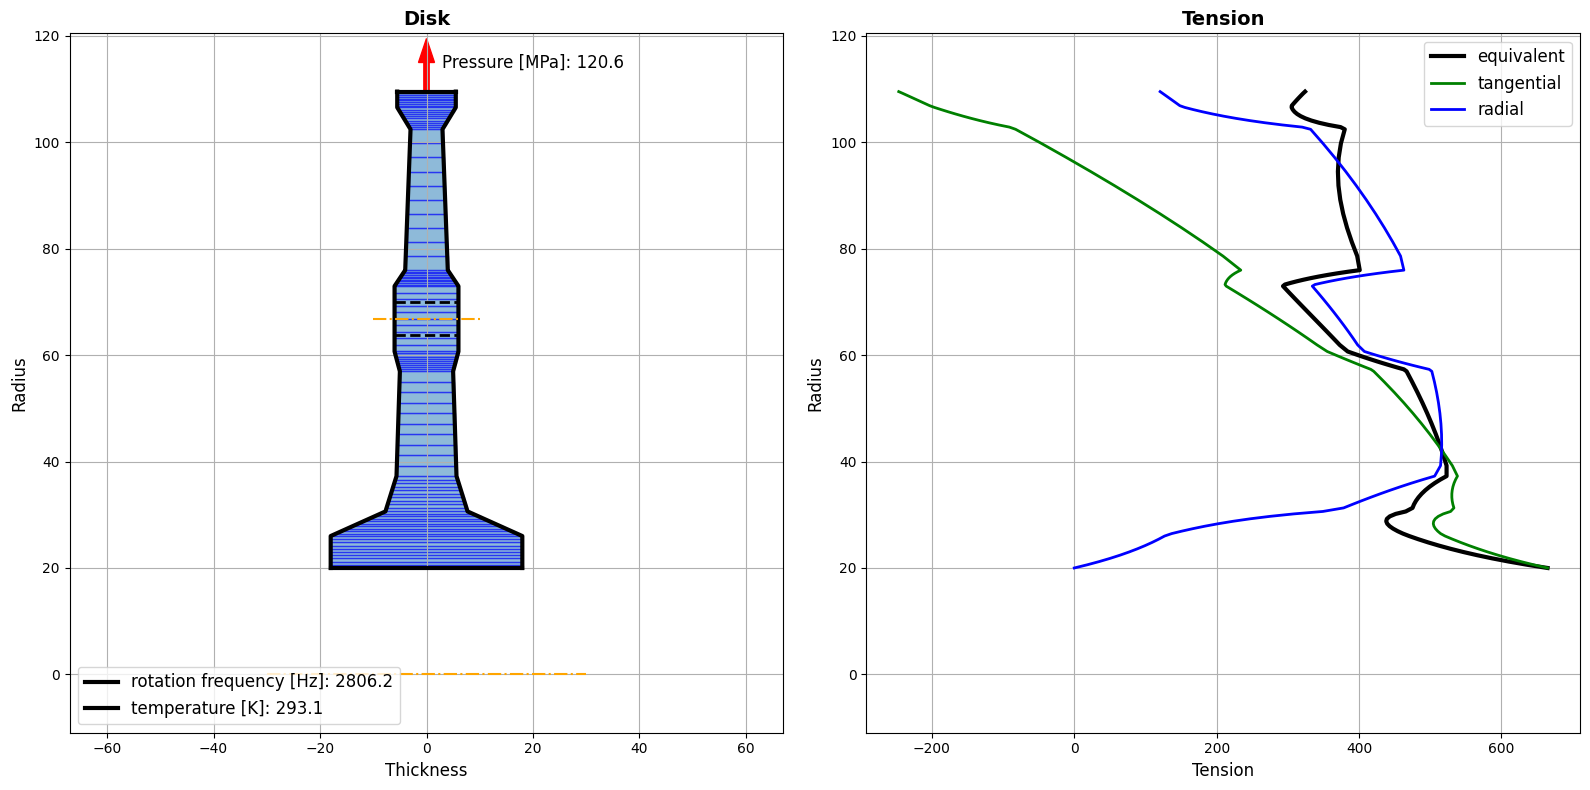

In [9]:
tensions = disk.tensions(**condition, discreteness=10, show=True)

In [10]:
f_sigma_t = interpolate.interp1d(tensions['radius'], tensions['tension_t'], kind=1)
f_sigma_r = interpolate.interp1d(tensions['radius'], tensions['tension_r'], kind=1)
for i in range(len(disk.nholes)):
    local_tension = disk.local_tension(disk.nholes[i],  disk.rholes[i], disk.dholes[i],
                                        float(f_sigma_t(disk.rholes[i])), float(f_sigma_r(disk.rholes[i])))
    print(f'holes: {i}, nholes []: {disk.nholes[i]}, rholes: {disk.rholes[i]}, dholes: {disk.dholes[i]}')
    print(f'tension_t in {local_tension}')


holes: 0, nholes []: 5, rholes: 0.0668, dholes: 0.0062
tension_t in (512.5422761589398, 535.8396523479823)


# Design equal strength disk

In [11]:
equal_strength = disk.equal_strength(400 * 10 ** 6, condition["rotation_frequency"], max(condition['temperature']), ndis=10, show=False)

In [12]:
radius_equal_strength = linspace(0, disk.radius[-1], 10, endpoint=True)
thickness_equal_strength = equal_strength(radius_equal_strength)

disk_equal_strength = Disk(material=disk.material, radius=radius_equal_strength, thickness=thickness_equal_strength)

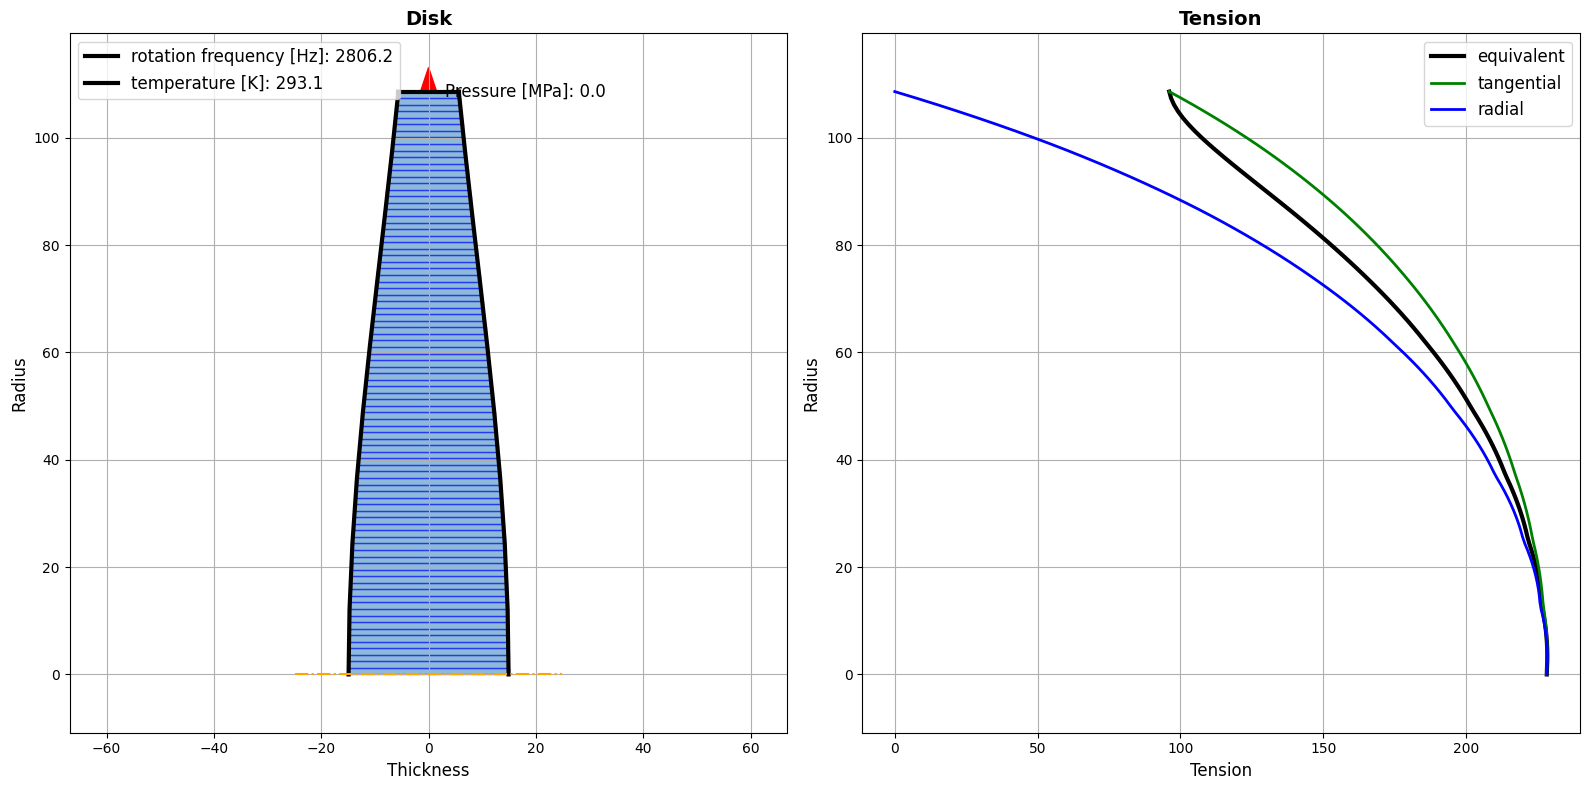

In [13]:
tensions = disk_equal_strength.tensions(rotation_frequency=condition['rotation_frequency'],
                                    temperature0=condition['temperature0'],
                                    pressure=(0, 0), temperature=(700, 700),
                                    discreteness=10, show=True)

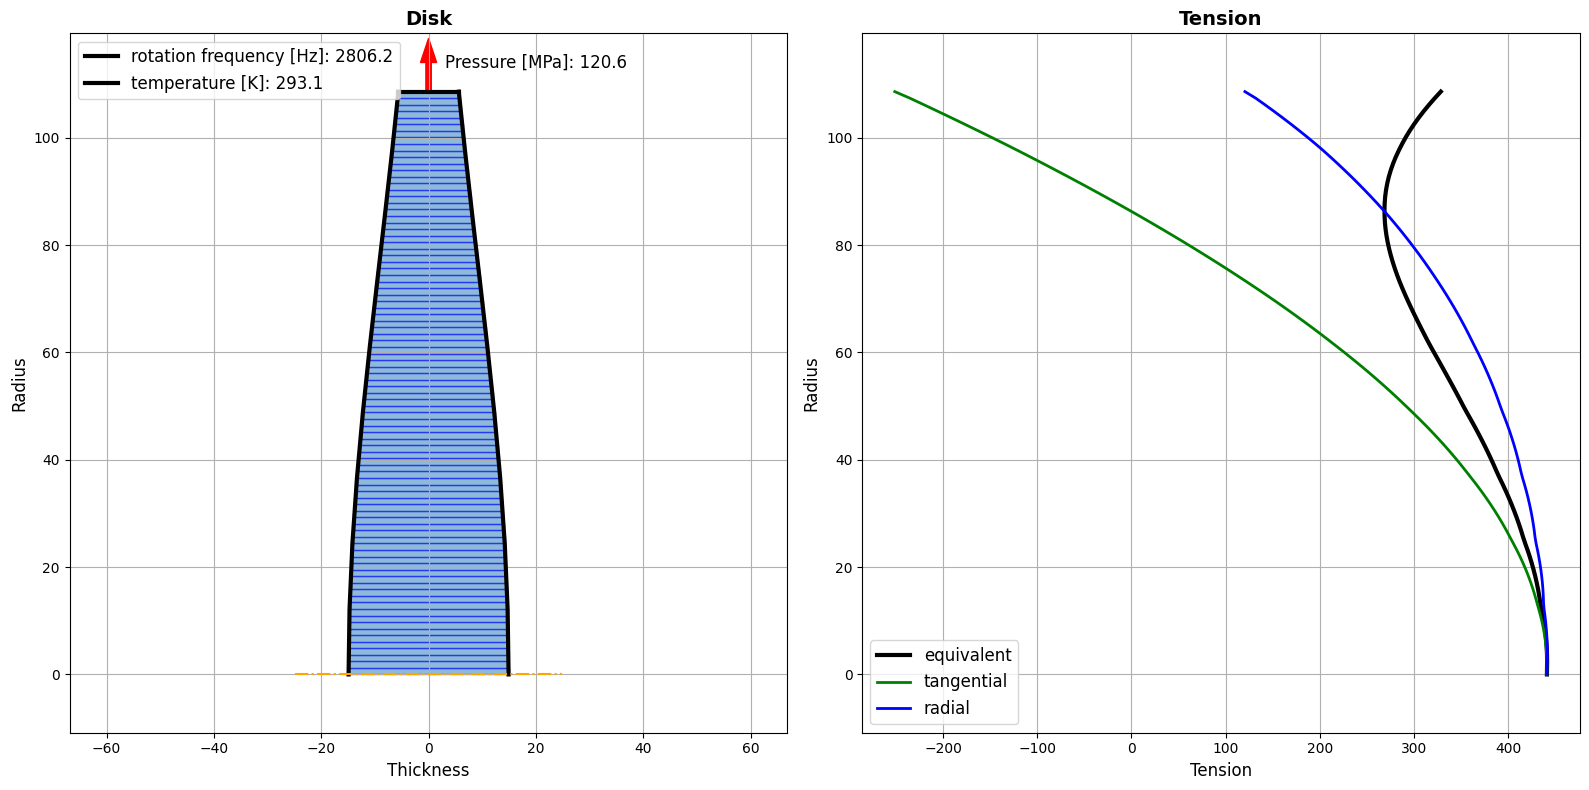

In [14]:
tensions = disk_equal_strength.tensions(**condition, discreteness=10, show=True)

In [15]:
disk.frequency_safety_factor(condition["rotation_frequency"], temperature=600, pressure=pressure)

((1.8108353315127532, 1.9114372943745725), '')

# Natural frequencies

In [16]:
for name, fastening in zip(('РК', 'НА'),(0, -1)):
    print(f'{name}: {fastening = }')
    for d in range(0, 3+1, 1): # число узловых диаметров
        for c in range(0, 3+1, 1): # число узловых окружностей
            print('\t'+f'{d = } {c = } {disk.natural_frequencies(fastening, d, c)}')

РК: fastening = 0
	d = 0 c = 0 (1067.2864718484743, '1/s')
	d = 0 c = 1 (5951.189367027094, '1/s')
	d = 0 c = 2 (17270.11816313745, '1/s')
	d = 0 c = 3 (nan, '1/s')
	d = 1 c = 0 (973.3652623258087, '1/s')
	d = 1 c = 1 (7843.844043771722, '1/s')
	d = 1 c = 2 (nan, '1/s')
	d = 1 c = 3 (nan, '1/s')
	d = 2 c = 0 (1534.0464222035405, '1/s')
	d = 2 c = 1 (9904.418458753842, '1/s')
	d = 2 c = 2 (nan, '1/s')
	d = 2 c = 3 (nan, '1/s')
	d = 3 c = 0 (3554.7754755699852, '1/s')
	d = 3 c = 1 (15169.698386539649, '1/s')
	d = 3 c = 2 (nan, '1/s')
	d = 3 c = 3 (nan, '1/s')
НА: fastening = -1
	d = 0 c = 0 (2914.4035924609007, '1/s')
	d = 0 c = 1 (11327.467087885141, '1/s')
	d = 0 c = 2 (25330.265598537128, '1/s')
	d = 0 c = 3 (45053.719598296935, '1/s')
	d = 1 c = 0 (6047.956673808022, '1/s')
	d = 1 c = 1 (17304.2713302366, '1/s')
	d = 1 c = 2 (34153.16709915118, '1/s')
	d = 1 c = 3 (56637.335439425704, '1/s')
	d = 2 c = 0 (9562.88678776233, '1/s')
	d = 2 c = 1 (24077.98280490158, '1/s')
	d = 2 c = 2 (

# Campbell diagram

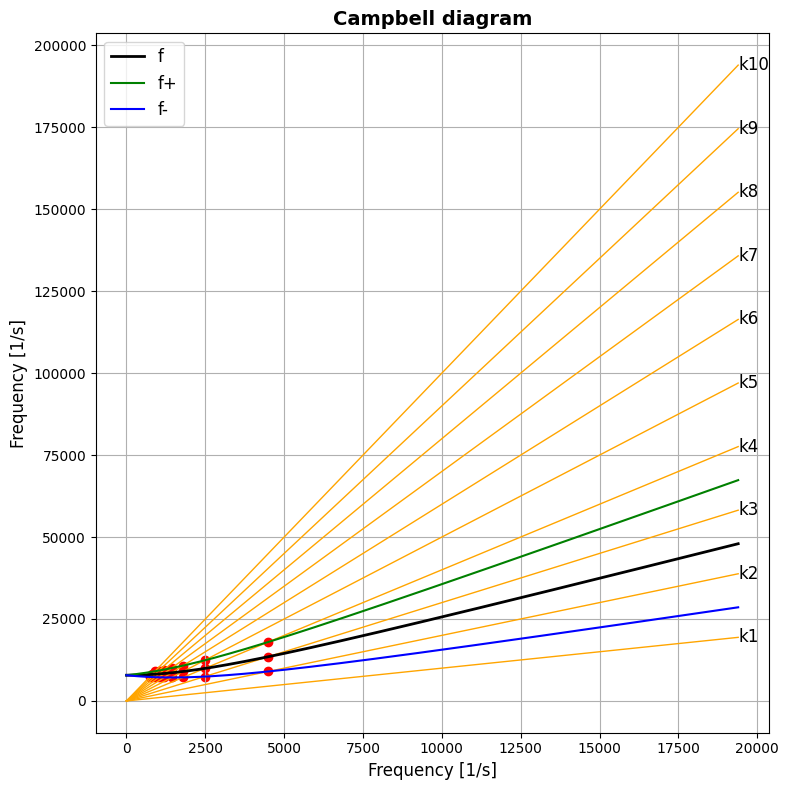

In [17]:
resonance = disk.campbell_diagram(0, 1, 1, condition["rotation_frequency"] * 1.1, multiplicity=arange(1, 10+1, 1))

In [18]:
resonance

([731.283271,
  808.815658,
  905.427335,
  1029.503525,
  1195.480158,
  1430.891527,
  1797.138136,
  2474.263333,
  4491.372034],
 '1/s')